Main Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9896 entries, 0 to 9895
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   InstanceID    9896 non-null   int64 
 1   patientID     9896 non-null   int64 
 2   ImageName     9896 non-null   object
 3   cellTypeName  9896 non-null   object
 4   cellType      9896 non-null   int64 
 5   isCancerous   9896 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 464.0+ KB
None

Extra Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10384 entries, 0 to 10383
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   InstanceID   10384 non-null  int64 
 1   patientID    10384 non-null  int64 
 2   ImageName    10384 non-null  object
 3   isCancerous  10384 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 324.6+ KB
None

Main Data Sample:
   InstanceID  patientI

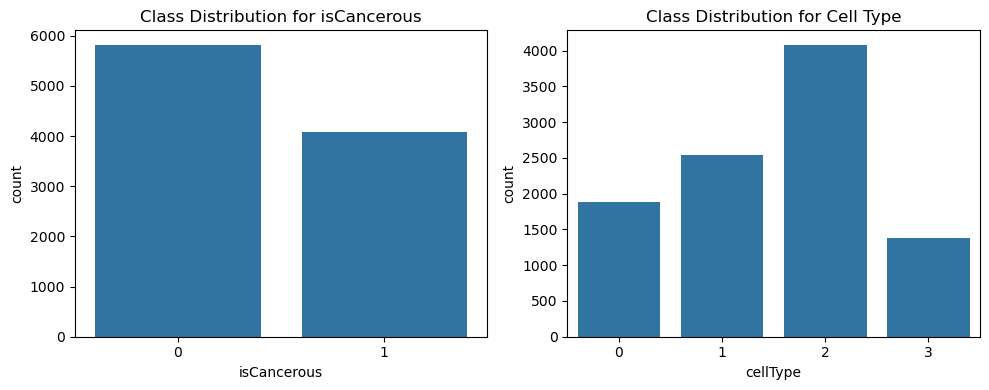


--- Checking for Missing Values ---
InstanceID      0
patientID       0
ImageName       0
cellTypeName    0
cellType        0
isCancerous     0
dtype: int64

--- Summary Statistics for Main Data ---
         InstanceID    patientID     cellType  isCancerous
count   9896.000000  9896.000000  9896.000000  9896.000000
mean   10193.880154    29.762025     1.501516     0.412187
std     6652.912660    17.486553     0.954867     0.492253
min        1.000000     1.000000     0.000000     0.000000
25%     4135.750000    14.000000     1.000000     0.000000
50%     9279.500000    26.000000     2.000000     0.000000
75%    16821.250000    47.000000     2.000000     1.000000
max    22444.000000    60.000000     3.000000     1.000000
Displaying sample images from the dataset:


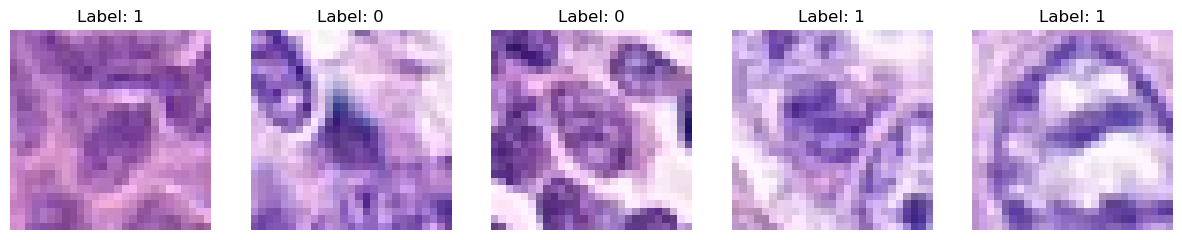

isCancerous
0    0.587813
1    0.412187
Name: proportion, dtype: float64
cellType
2    0.412187
1    0.256973
0    0.190784
3    0.140057
Name: proportion, dtype: float64


In [76]:
""# Colon Cancer Image Classification Project
# Step 1: Data Loading and Exploration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

# Paths to CSV files and Image folder
MAIN_DATA_CSV = 'data_labels_mainData.csv'
EXTRA_DATA_CSV = 'data_labels_extraData.csv'
IMAGE_FOLDER = 'patch_images/'

# Load CSV data
main_data = pd.read_csv(MAIN_DATA_CSV)
extra_data = pd.read_csv(EXTRA_DATA_CSV)

# Display basic info
print('Main Data Information:')
print(main_data.info())
print('\nExtra Data Information:')
print(extra_data.info())

# Display first few rows
print('\nMain Data Sample:')
print(main_data.head())
print('\nExtra Data Sample:')
print(extra_data.head())

# Check class distribution
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='isCancerous', data=main_data)
plt.title('Class Distribution for isCancerous')
plt.subplot(1, 2, 2)
sns.countplot(x='cellType', data=main_data)
plt.title('Class Distribution for Cell Type')
plt.tight_layout()
plt.show()

# Function to load and display a few images
def display_sample_images(df, image_folder, num_samples=5):
    samples = df.sample(num_samples)
    plt.figure(figsize=(15, 3))
    for idx, row in enumerate(samples.iterrows()):
        img_path = os.path.join(image_folder, row[1]['ImageName'])
        img = Image.open(img_path)
        plt.subplot(1, num_samples, idx + 1)
        plt.imshow(img)
        plt.title(f"Label: {row[1]['isCancerous']}")
        plt.axis('off')
    plt.show()

# Checking for Missing Values
print("\n--- Checking for Missing Values ---")
print(main_data.isnull().sum())

# Summary Statistics for Main Data
print("\n--- Summary Statistics for Main Data ---")
print(main_data.describe())


# Display some sample images
print("Displaying sample images from the dataset:")
display_sample_images(main_data, IMAGE_FOLDER)
# Checking class balance
print(main_data['isCancerous'].value_counts(normalize=True))
print(main_data['cellType'].value_counts(normalize=True))



**Class Imbalance Identification, and Exploratory Data Analysis** 

There is an imbalance between non cancerous (58.78 %) in comparison to cancerous (41.22%), meaning the model may be biased towards non cancerous.

This means careful metric selection and data balancing is needed to ensure cancerous cases aren't overlooked.

The cellType shows a clear imbalance across its four categories. Type 2 is the most prevalent (41.22%), while Type 3 is the least represented (14.01%). This imbalance could bias the model to perform better on Type 2 cells while misclassifying less represented types, such as Type 3. To mitigate this, class balancing strategies such as augmentation or class-weight adjustments will be considered during model training.

Additionally from the sample images, blur looks like a potential issue.

**Justification of Data Handling Methods**

Data augmentation in CNN provides a way to reduce overfitting within a model. Augmentation is a form of regularisation by providing a model with a more expansive set of training data. To do this, the new data is generated using the existing data in order to put towards a training set for the model. Using these modified copies of existing data, the model can be more easily trained to generalise itself rather than to rely heavily on the training dataset. This reduces the overfitting of the model towards the training dataset.

In [ ]:
from sklearn.model_selection import train_test_split
#unique ID avoids data leakage
patient_ids = main_data['patientID'].unique()

#split IDs to 70% train and 30 percent temporary split
train_x, temp_x = train_test_split(patient_ids, test_size=0.3, random_state=42)

#split remaining 30 in halp for validation and test, 15% each
val_x, test_x = train_test_split(temp_x, test_size=0.5, random_state=42)

#creates Dataframe, filtering IDS
train_Data = main_data[main_data['patientID'].isin(train_x)]
val_Data = main_data[main_data['patientID'].isin(val_x)]
test_Data = main_data[main_data['patientID'].isin(test_x)]

print(f"Train: {len(train_Data)}, Val: {len(val_Data)}, Test: {len(test_Data)}")

#ensure no overlap
train_patients_set = set(train_x)
val_patients_set = set(val_x)
test_patients_set = set(test_x)

overlap_train_val = train_patients_set.intersection(val_patients_set)
overlap_train_test = train_patients_set.intersection(test_patients_set)
overlap_val_test = val_patients_set.intersection(test_patients_set)
#should be empty if no overlap
print(f"Train-Val Overlap: {overlap_train_val}")
print(f"Train-Test Overlap: {overlap_train_test}")
print(f"Val-Test Overlap: {overlap_val_test}")


Train: 6778, Val: 1257, Test: 1861
Train-Val Overlap: set()
Train-Test Overlap: set()
Val-Test Overlap: set()


**Data splitting Strategy**

Using a 3 way split, ennsures proper model development and hyperparaamater tuning. Training split used for model weight, containing majority of labeled data. Validation set is a serperate portion used to finetune hyper parameters, and ensure early stopping to avoid training too long and overfitting. Test set is used evaluate generilzed performance on the final model, using it as unseen data, providing an indication how the model would perform in a real life scenario.

6778 + 1257 + 1861 = 9896, which matches with amount of patients count from earlier. Meaning there should be no overlap but I did additionally make a method to ensure there is no overlap.

**Performance Metrics Selection**

F1-score will be used as the primary evaluation metric because it balances precision and recall, making it more suitable for imbalanced datasets where accuracy can be misleading.

Found 6778 validated image filenames belonging to 2 classes.
Found 1257 validated image filenames belonging to 2 classes.
Found 1861 validated image filenames belonging to 2 classes.
Num GPUs Available:  0
Epoch 1/15


c:\Users\kumar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


212/212 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.7046 - loss: 0.5635 - val_accuracy: 0.8942 - val_loss: 0.2910
Epoch 2/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.8619 - loss: 0.3220 - val_accuracy: 0.8735 - val_loss: 0.3170
Epoch 3/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.8657 - loss: 0.3231 - val_accuracy: 0.8982 - val_loss: 0.2667
Epoch 4/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.8931 - loss: 0.2727 - val_accuracy: 0.9014 - val_loss: 0.2432
Epoch 5/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.8813 - loss: 0.2855 - val_accuracy: 0.8998 - val_loss: 0.2615
Epoch 6/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.8759 - loss: 0.3004 - val_accuracy: 0.8934 - val_loss: 0.2608
Epoch 7/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.8903 - loss: 0.2692 - val_accuracy: 0.8942 - val_loss: 0.2858
Epoch 8/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.8988 - loss: 0.2569 - val_accuracy: 0.900

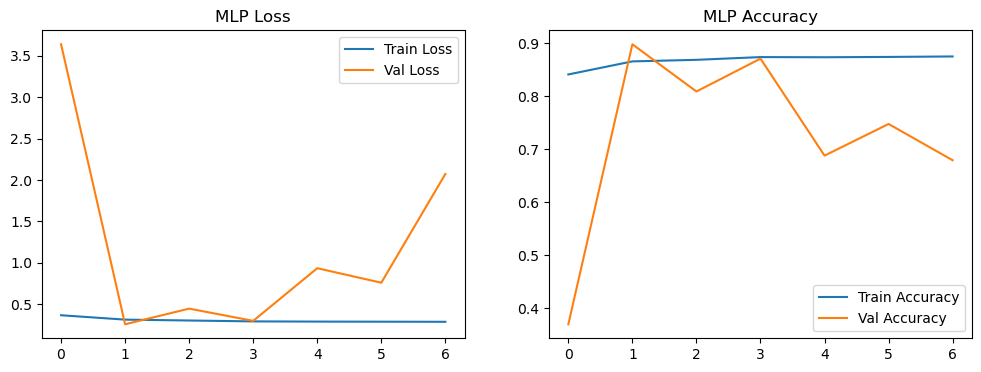

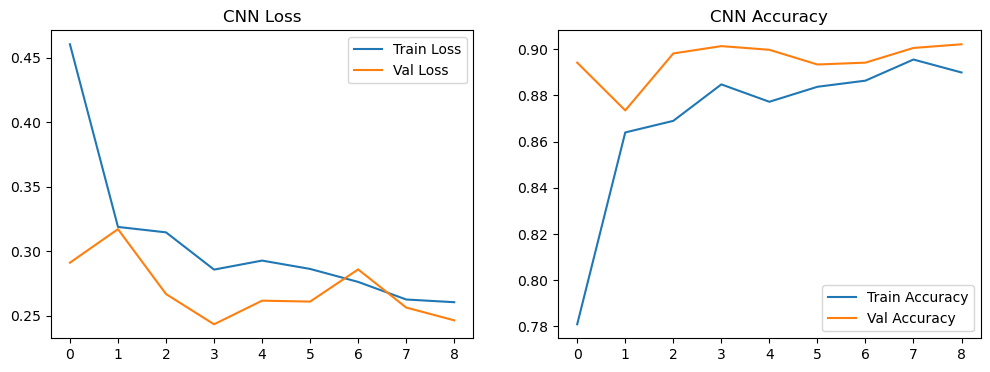

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
CNN Test F1-Score: 0.8686
MLP Test F1-Score: 0.8260


In [78]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from tensorflow.keras import layers, models, regularizers, optimizers
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Set image size
target_image_size = (64, 64)

# Copy and prepare data
train_Data = train_Data.copy()
val_Data = val_Data.copy()
test_Data = test_Data.copy()

train_Data['isCancerous_str'] = train_Data['isCancerous'].astype(str)
val_Data['isCancerous_str'] = val_Data['isCancerous'].astype(str)
test_Data['isCancerous_str'] = test_Data['isCancerous'].astype(str)

# Image generators
train_Datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_Datagen.flow_from_dataframe(
    train_Data,
    directory=IMAGE_FOLDER,
    x_col='ImageName',
    y_col='isCancerous_str',
    target_size=target_image_size,
    batch_size=32,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_dataframe(
    val_Data,
    directory=IMAGE_FOLDER,
    x_col='ImageName',
    y_col='isCancerous_str',
    target_size=target_image_size,
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_dataframe(
    test_Data,
    directory=IMAGE_FOLDER,
    x_col='ImageName',
    y_col='isCancerous_str',
    target_size=target_image_size,
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Define CNN model
def create_cnn_model():
    model = models.Sequential([
        layers.Input(shape=(64, 64, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def create_mlp_model():
    model = models.Sequential([
        layers.Input(shape=(64, 64, 3)),
        layers.Flatten(),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Compile models
cnn_model = create_cnn_model()
cnn_model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

mlp_model = create_mlp_model_iscancerous_64()
mlp_model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(patience=5, restore_best_weights=True)

# Train models
history_cnn = cnn_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    callbacks=[early_stop]
)

history_mlp = mlp_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    callbacks=[early_stop]
)

# Plot learning curves
def plot_learning_curves(history, model_name):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()
    plt.show()

plot_learning_curves(history_cnn, 'CNN')
plot_learning_curves(history_mlp, 'MLP')

# Predict and evaluate
test_preds_cnn = cnn_model.predict(test_generator)
test_preds_cnn_labels = (test_preds_cnn > 0.5).astype(int)

test_preds_mlp = mlp_model.predict(test_generator)
test_preds_mlp_labels = (test_preds_mlp > 0.5).astype(int)

true_labels = test_generator.classes

f1_cnn = f1_score(true_labels, test_preds_cnn_labels)
f1_mlp = f1_score(true_labels, test_preds_mlp_labels)

print(f'CNN Test F1-Score: {f1_cnn:.4f}')
print(f'MLP Test F1-Score: {f1_mlp:.4f}')



Found 6778 validated image filenames belonging to 4 classes.
Found 1257 validated image filenames belonging to 4 classes.
Found 1861 validated image filenames belonging to 4 classes.
Epoch 1/15


c:\Users\kumar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


212/212 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - categorical_accuracy: 0.4299 - loss: 1.9978 - val_categorical_accuracy: 0.6921 - val_loss: 0.9909
Epoch 2/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - categorical_accuracy: 0.6080 - loss: 1.1383 - val_categorical_accuracy: 0.7096 - val_loss: 0.9714
Epoch 3/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - categorical_accuracy: 0.6399 - loss: 1.0486 - val_categorical_accuracy: 0.7168 - val_loss: 0.9230
Epoch 4/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - categorical_accuracy: 0.6481 - loss: 1.0273 - val_categorical_accuracy: 0.6714 - val_loss: 0.9769
Epoch 5/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - categorical_accuracy: 0.6668 - loss: 0.9955 - val_categorical_accuracy: 0.6325 - val_loss: 1.0581
Epoch 6/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - categorical_accuracy: 0.6571 - loss: 0.9844 - val_categorical_accuracy: 0.6691 - val_loss: 0.9542
Epoch 7/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - categorical_accuracy: 0.6424 - loss: 0

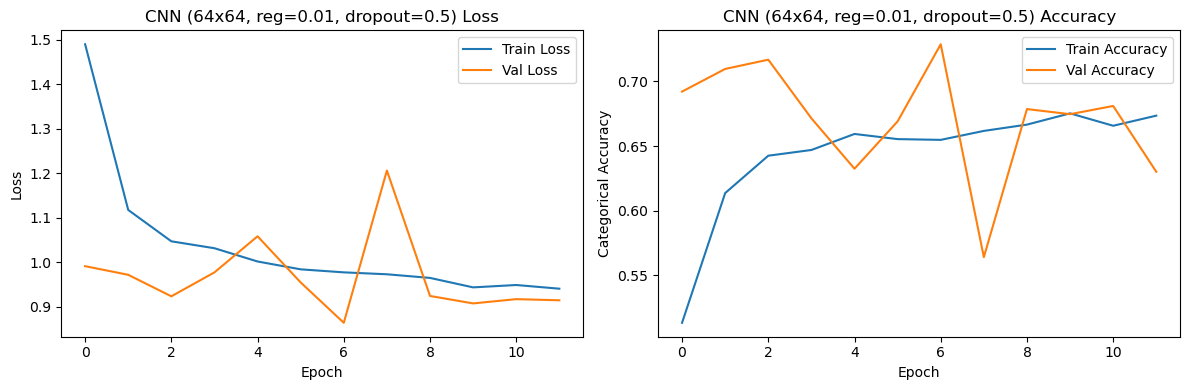

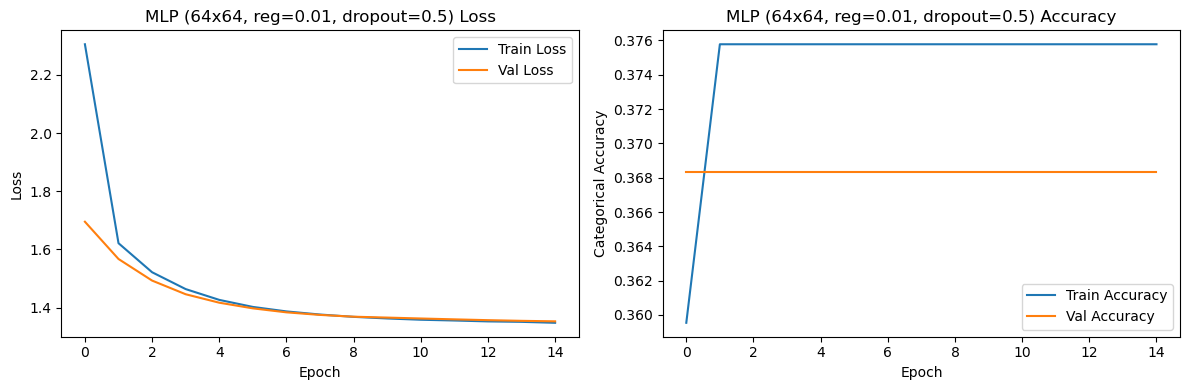

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import f1_score

# Set image size
target_image_size = (64, 64)

# Copy and prepare data, had warning to manage this wayy
train_Data = train_Data.copy()
val_Data = val_Data.copy()
test_Data = test_Data.copy()

train_Data['cellType_str'] = train_Data['cellType'].astype(str)
val_Data['cellType_str'] = val_Data['cellType'].astype(str)
test_Data['cellType_str'] = test_Data['cellType'].astype(str)

# Image generators
train_generator_ct = train_Datagen.flow_from_dataframe(
    train_Data,
    directory=IMAGE_FOLDER,
    x_col='ImageName',
    y_col='cellType_str',
    target_size=target_image_size,
    batch_size=32,
    class_mode='categorical'
)

val_generator_ct = val_test_datagen.flow_from_dataframe(
    val_Data,
    directory=IMAGE_FOLDER,
    x_col='ImageName',
    y_col='cellType_str',
    target_size=target_image_size,
    batch_size=32,
    class_mode='categorical'
)

test_generator_ct = val_test_datagen.flow_from_dataframe(
    test_Data,
    directory=IMAGE_FOLDER,
    x_col='ImageName',
    y_col='cellType_str',
    target_size=target_image_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# CNN model
def create_cnn_model_multiclass():
    model = models.Sequential([
        layers.Input(shape=(64, 64, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(0.5),
        layers.Dense(4, activation='softmax')  # 4 classes
    ])
    return model

# MLP model
def create_mlp_model_multiclass():
    model = models.Sequential([
        layers.Input(shape=(64, 64, 3)),
        layers.Flatten(),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.5),
        layers.Dense(4, activation='softmax')  # 4 classes
    ])
    return model

# Compile models
cnn_model_ct = create_cnn_model_multiclass()
cnn_model_ct.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                     loss=CategoricalCrossentropy(),
                     metrics=['categorical_accuracy'])

mlp_model_ct = create_mlp_model_multiclass()
mlp_model_ct.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                     loss=CategoricalCrossentropy(),
                     metrics=['categorical_accuracy'])

# Early stopping
early_stop = EarlyStopping(patience=5, restore_best_weights=True)

# Train models
history_cnn_ct = cnn_model_ct.fit(
    train_generator_ct,
    validation_data=val_generator_ct,
    epochs=15,
    callbacks=[early_stop]
)

history_mlp_ct = mlp_model_ct.fit(
    train_generator_ct,
    validation_data=val_generator_ct,
    epochs=15,
    callbacks=[early_stop]
)

# Predict
cnn_preds_ct = cnn_model_ct.predict(test_generator_ct)
cnn_preds_ct_labels = cnn_preds_ct.argmax(axis=1)

mlp_preds_ct = mlp_model_ct.predict(test_generator_ct)
mlp_preds_ct_labels = mlp_preds_ct.argmax(axis=1)

# True labels
true_labels_ct = test_generator_ct.classes

# F1 scores
f1_cnn_ct = f1_score(true_labels_ct, cnn_preds_ct_labels, average='weighted')
f1_mlp_ct = f1_score(true_labels_ct, mlp_preds_ct_labels, average='weighted')

print(f'CNN cellType F1-Score: {f1_cnn_ct:.4f}')
print(f'MLP cellType F1-Score: {f1_mlp_ct:.4f}')

# Plot learning curves
def plot_learning_curves(history, model_name):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['categorical_accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_categorical_accuracy'], label='Val Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Categorical Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot for both models
plot_learning_curves(history_cnn_ct, 'CNN' )
plot_learning_curves(history_mlp_ct, 'MLP')

**Base Model Selection**

The baseline model choice is for the MLP model, for both isCancerous and cellType. This was the model used in order to ensure that the finished model would be both more robust and more accurate. The model choice for the chosen model is the CNN model, for both isCancerous and cellType. The CNN model was thought to be theoretically superior due to its strong capability of image processing and classification. On an analysis of F1-scores, time taken to compute a model, and accuracy, it shows that the CNN model outperforms the MLP model in regards to each form of analysis, for both isCancerous and cellType sets of data.

**Prevention of Data Leakages**

As with all things involving the medical field, avoiding patient-based data leakage is paramount. There’s serious risks that a model trained on data from outside the training set, will respond poorly on future data. For example if the model is performing impressively during training and validation, but when testing it on real world data it entirely misses targets and has poor accuracy. 

One method to reduce data leakage without risking a loss of confidentiality would be to use some kind of encryption for patient data. In this way, a patient’s ID can be attached to data even within databases, without a risk of losing confidentiality. If a patient’s ID was encrypted, then you could compare the encrypted strings in order to ensure that no data is being leaked between sets, whilst also maintaining the confidentiality of the patient’s sensitive information. 

Another method to reduce data leakage would be to introduce heavy auditing of data. If a model is showing unexpected patterns in prediction, or looks to be performing in an atypical way for the data it's being trained on, it could use a deeper investigation in order to maintain its accuracy and its scope towards only the expected train data. If the model starts to show worse signs of performance as its being introduced to new data, it gives a strong correlation that earlier training and metrics that were used on the model could have data leakage within them. 


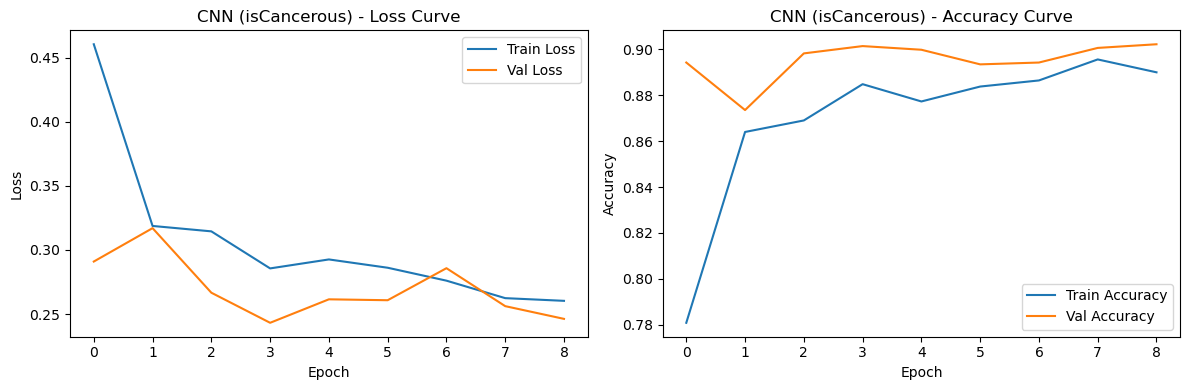

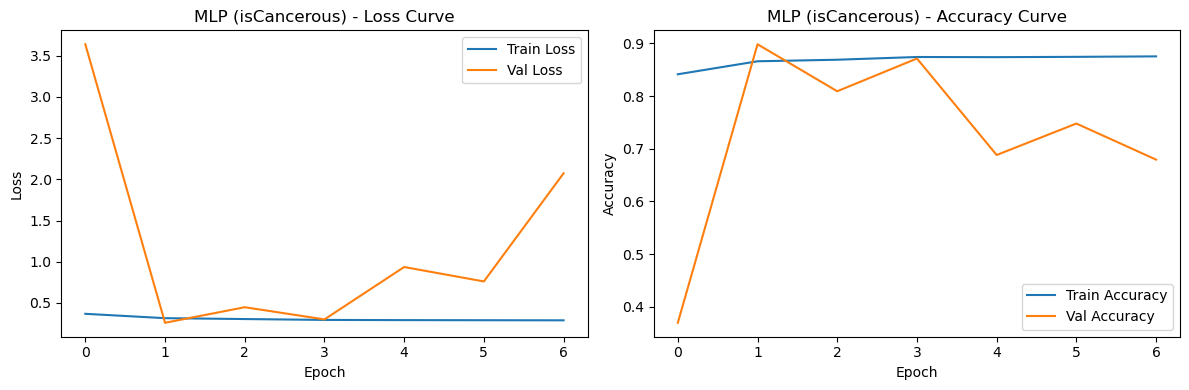

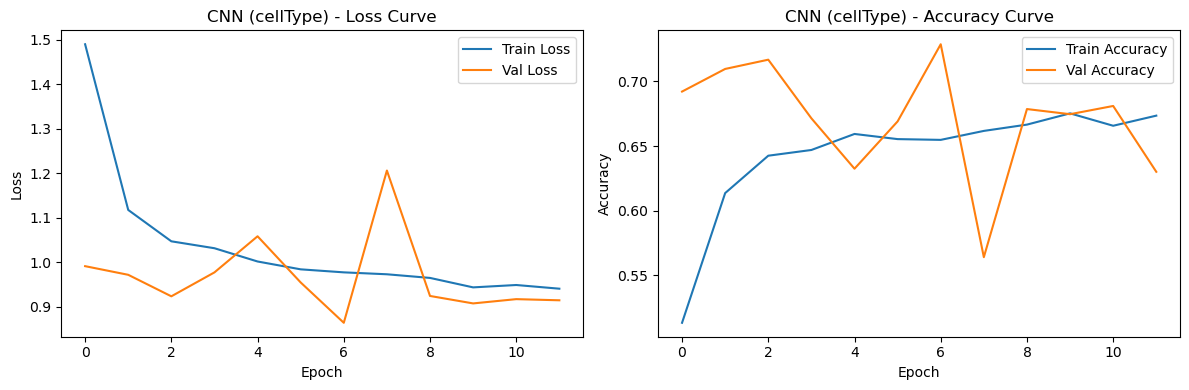

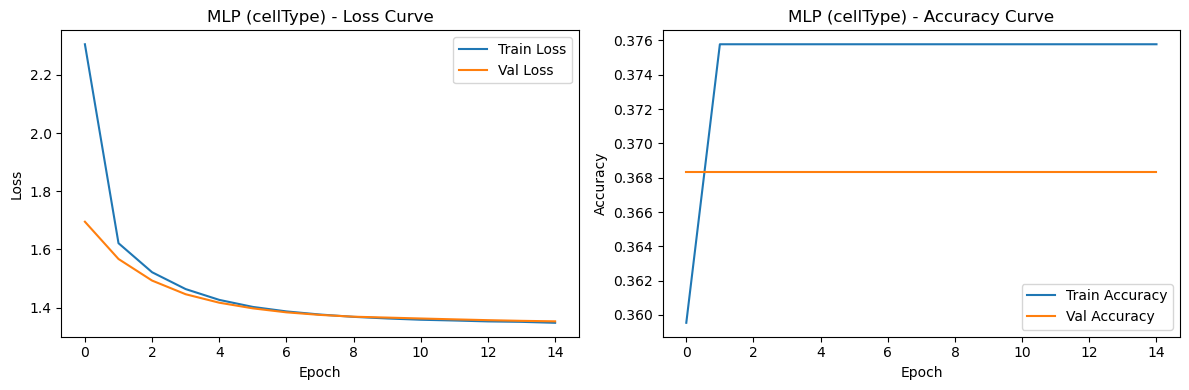

In [81]:
# # OVERFITTING/UNDERFITTING DETECTION    (1.4)
# # ADD VISUAL TOOLS (learning curves?) to explain model fitting status, 0.5 marks per method
# from sklearn.model_selection import learning_curve
# from sklearn.ensemble import RandomForestClassifier
# import matplotlib.pyplot as plt

# #THIS LINE, split for train (X) and target (y)
# X, y = train_Data["isCancerous"], train_Data["Count"]

# train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(),
#                                                         X, y, cv = 10, scoring = "accuracy", n_jobs = -1,
#                                                         train_sizes = np.linspace(0.01, 1.0, 50)
#                                                         )

# train_mean = np.mean(train_scores, axis = 1)
# train_std = np.std(train_scores, axis = 1)

# test_mean = np.mean(test_scores, axis = 1)
# test_std = np.std(test_scores, axis = 1)

# plt.subplots(1, figsize = (10, 10))
# plt.plot(train_sizes, train_mean, '--', color = "blue", label = "Training Scores")
# plt.plot(train_sizes, test_mean, color = "red", label = "Cross-Validation Scores")

# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color = "red")
# plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color = "blue")

# plt.title("Learning Curve")
# plt.xlabel("Training Set Size")
# plt.ylabel("Accuracy Score")
# plt.legend(loc = "best")
# plt.tight_layout()
# plt.show()

import matplotlib.pyplot as plt

def plot_learning_curves(history, model_name):
    plt.figure(figsize=(12, 4))

    # Loss curve
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} - Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy curve
    acc_key = 'accuracy' if 'accuracy' in history.history else 'categorical_accuracy'
    val_acc_key = 'val_accuracy' if 'val_accuracy' in history.history else 'val_categorical_accuracy'

    plt.subplot(1, 2, 2)
    plt.plot(history.history[acc_key], label='Train Accuracy')
    plt.plot(history.history[val_acc_key], label='Val Accuracy')
    plt.title(f'{model_name} - Accuracy Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_learning_curves(history_cnn, "CNN (isCancerous)")
plot_learning_curves(history_mlp, "MLP (isCancerous)")
plot_learning_curves(history_cnn_ct, "CNN (cellType)")
plot_learning_curves(history_mlp_ct, "MLP (cellType)")


**Optimisation Techniques**

Dropout is a technique where a random set of neurons within the network are dropped (or zeroed out) during an iteration. The reason for doing this is that it allows the network to not rely just on a few specific nodes, instead favouring a use of varied nodes which can learn more generally. This is a technique which can help a model perform better on newer data, as the more generally the model learns, the more likely it can adapt to newer data.

Regularisation is a technique where a penalty is added to a loss function and incorporated into the model, in order to prevent the model from overfitting and dissuade it from learning patterns too heavily related to the training dataset. It once again helps a model perform better on newer data, as the less overfitted a model, the more likely it will perform well on a more general set of data.

**Overfitting and underfitting**

The loss and accuracy curves were added to the data, providing a visual reference and a visual tool in order to analyse the model fitting. For the CNN model on the isCancerous data, the loss and accuracy curves between train and validation are closely tied together, suggested that the model is able to generalise to newer data. For the MLP model on the same sets of data, the two curves have more apparent differences which suggests that there was more heavy overfitting for the MLP model towards the training dataset.

**Validation Set Use**

A validation set is another way to reduce overfitting, and also underfitting. By having a validation set, once the model has been trained on the train set it can then be compared against the validation set in order to see any strange patterns (such as overfitting or underfitting), as it exists as its own separate dataset you can see a direct correlation between how the model handles unseen data. The validation set can also be used to tune characteristics and find the most accurate model and configurations if there's several models being considered (such as in our assignment). By using a validation set the hyperparameters within the model can be tuned and the model's peak performance can be achieved without overfitting to the train set.

Found 6778 validated image filenames belonging to 2 classes.
Found 1257 validated image filenames belonging to 2 classes.
Found 1861 validated image filenames belonging to 2 classes.
Num GPUs Available:  0
Epoch 1/15


c:\Users\kumar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


212/212 ━━━━━━━━━━━━━━━━━━━━ 27s 121ms/step - accuracy: 0.6794 - loss: 0.6661 - val_accuracy: 0.9053 - val_loss: 0.2672
Epoch 2/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 25s 120ms/step - accuracy: 0.8391 - loss: 0.3836 - val_accuracy: 0.9045 - val_loss: 0.2509
Epoch 3/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 26s 123ms/step - accuracy: 0.8699 - loss: 0.3267 - val_accuracy: 0.8274 - val_loss: 0.3801
Epoch 4/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 25s 116ms/step - accuracy: 0.8845 - loss: 0.3097 - val_accuracy: 0.9006 - val_loss: 0.2681
Epoch 5/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 26s 123ms/step - accuracy: 0.8821 - loss: 0.3038 - val_accuracy: 0.8974 - val_loss: 0.2835
Epoch 6/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 27s 128ms/step - accuracy: 0.8832 - loss: 0.3012 - val_accuracy: 0.8934 - val_loss: 0.2626
Epoch 7/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 26s 124ms/step - accuracy: 0.8875 - loss: 0.3001 - val_accuracy: 0.9228 - val_loss: 0.2298
Epoch 8/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 26s 122ms/step - accuracy: 0.8752 - loss: 0.3094 - val

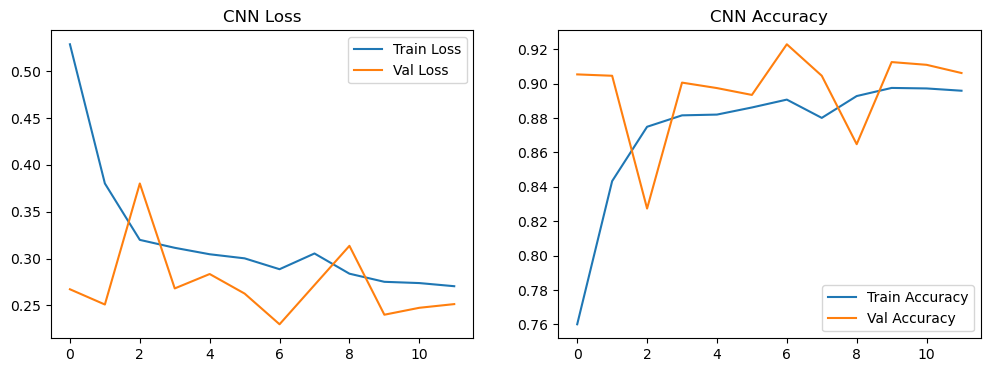

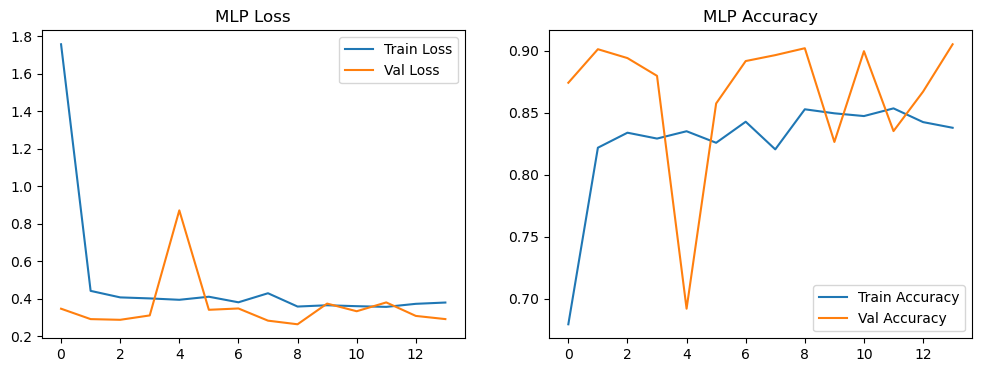

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
CNN Test F1-Score: 0.8823
MLP Test F1-Score: 0.8804


In [ ]:
# FINAL MODEL ACCURACY  (1.5)
# ADD CODE / need to show improved accuracy and provide justifications (e.g. deeper layers, model switch...)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from sklearn.metrics import f1_score, classification_report
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models, regularizers

train_Data = train_Data.copy()
val_Data = val_Data.copy()
test_Data = test_Data.copy()

#makes isCancerous string, allows image category labeling
train_Data.loc[:, 'isCancerous_str'] = train_Data['isCancerous'].astype(str)
val_Data.loc[:, 'isCancerous_str'] = val_Data['isCancerous'].astype(str)
test_Data.loc[:, 'isCancerous_str'] = test_Data['isCancerous'].astype(str)

#augmentation, improves generalizability 
train_Datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

#no augmentation 
val_test_datagen = ImageDataGenerator(rescale=1./255)

target_image_size = (128, 128)

train_generator = train_Datagen.flow_from_dataframe(
    train_Data,
    directory=IMAGE_FOLDER,
    x_col='ImageName',
    y_col='isCancerous_str',
    target_size=target_image_size,
    batch_size=32,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_dataframe(
    val_Data,
    directory=IMAGE_FOLDER,
    x_col='ImageName',
    y_col='isCancerous_str',
    target_size=target_image_size,
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_dataframe(
    test_Data,
    directory=IMAGE_FOLDER,
    x_col='ImageName',
    y_col='isCancerous_str',
    target_size=target_image_size,
    batch_size=32,
    class_mode='binary',
    shuffle=False
)
#checking to see if tensor detects my gpu 
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


def create_cnn_model():
    model = models.Sequential([
        layers.Input(shape=(128, 128, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.0001)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.0001)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.0001)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.0001)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
        layers.Dropout(0.4),
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])
    return model

def create_mlp_model():
    model = models.Sequential([
        layers.Input(shape=(128, 128, 3)),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
        layers.Dense(1, activation='sigmoid')
    ])
    return model



cnn_model = create_cnn_model()
cnn_model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])


mlp_model = create_mlp_model()
mlp_model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

early_stop = EarlyStopping(patience=5, restore_best_weights=True)

history_cnn = cnn_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    callbacks=[early_stop]
)

history_mlp = mlp_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    callbacks=[early_stop]
)

def plot_learning_curves(history, model_name):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()
    plt.show()

plot_learning_curves(history_cnn, 'CNN')

plot_learning_curves(history_mlp, 'MLP')


# Predict CNN
test_preds_cnn = cnn_model.predict(test_generator)
test_preds_cnn_labels = (test_preds_cnn > 0.5).astype(int)
# Predict MLP
test_preds_mlp = mlp_model.predict(test_generator)
test_preds_mlp_labels = (test_preds_mlp > 0.5).astype(int)
# True labels
true_labels = test_generator.classes
# F1 Scores
f1_cnn = f1_score(true_labels, test_preds_cnn_labels)
f1_mlp = f1_score(true_labels, test_preds_mlp_labels)

print(f'CNN Test F1-Score: {f1_cnn:.4f}')
print(f'MLP Test F1-Score: {f1_mlp:.4f}')


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import f1_score


train_Data = train_Data.copy()
val_Data = val_Data.copy()
test_Data = test_Data.copy()

train_Data['cellType_str'] = train_Data['cellType'].astype(str)
val_Data['cellType_str'] = val_Data['cellType'].astype(str)
test_Data['cellType_str'] = test_Data['cellType'].astype(str)

target_image_size = (128, 128)

train_generator_ct = train_Datagen.flow_from_dataframe(
    train_Data,
    directory=IMAGE_FOLDER,
    x_col='ImageName',
    y_col='cellType_str',
    target_size=target_image_size,
    batch_size=32,
    class_mode='categorical'
)

val_generator_ct = val_test_datagen.flow_from_dataframe(
    val_Data,
    directory=IMAGE_FOLDER,
    x_col='ImageName',
    y_col='cellType_str',
    target_size=target_image_size,
    batch_size=32,
    class_mode='categorical'
)

test_generator_ct = val_test_datagen.flow_from_dataframe(
    test_Data,
    directory=IMAGE_FOLDER,
    x_col='ImageName',
    y_col='cellType_str',
    target_size=target_image_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


def create_cnn_model_multiclass():
    model = models.Sequential([
        layers.Input(shape=(128, 128, 3)),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.0001)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.0001)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.0001)),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
        layers.Dense(4, activation='softmax')  # 4 classes
    ])
    return model


def create_mlp_model_multiclass():
    model = models.Sequential([
        layers.Input(shape=(128, 128, 3)),
        layers.Flatten(),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
        layers.Dense(4, activation='softmax')
    ])
    return model


cnn_model_ct = create_cnn_model_multiclass()
cnn_model_ct.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                    loss=CategoricalCrossentropy(),
                    metrics=['categorical_accuracy'])

mlp_model_ct = create_mlp_model_multiclass()
mlp_model_ct.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                    loss=CategoricalCrossentropy(),
                    metrics=['categorical_accuracy'])

# Train with EarlyStopping
history_cnn_ct = cnn_model_ct.fit(
    train_generator_ct,
    validation_data=val_generator_ct,
    epochs=15,
    callbacks=[early_stop]
)

history_mlp_ct = mlp_model_ct.fit(
    train_generator_ct,
    validation_data=val_generator_ct,
    epochs=15,
    callbacks=[early_stop]
)

def plot_learning_curves(history, model_name):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()
    plt.show()

plot_learning_curves(history_cnn_ct, 'CNN')

plot_learning_curves(history_mlp_ct, 'MLP')


# Predict CNN
cnn_preds_ct = cnn_model_ct.predict(test_generator_ct)
cnn_preds_ct_labels = cnn_preds_ct.argmax(axis=1)

# Predict MLP
mlp_preds_ct = mlp_model_ct.predict(test_generator_ct)
mlp_preds_ct_labels = mlp_preds_ct.argmax(axis=1)

# True labels
true_labels_ct = test_generator_ct.classes

# F1 Scores
f1_cnn_ct = f1_score(true_labels_ct, cnn_preds_ct_labels, average='weighted')
f1_mlp_ct = f1_score(true_labels_ct, mlp_preds_ct_labels, average='weighted')

print(f'CNN cellType F1-Score: {f1_cnn_ct:.4f}')
print(f'MLP cellType F1-Score: {f1_mlp_ct:.4f}')

Found 6778 validated image filenames belonging to 4 classes.
Found 1257 validated image filenames belonging to 4 classes.
Found 1861 validated image filenames belonging to 4 classes.
Epoch 1/15


c:\Users\kumar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


212/212 ━━━━━━━━━━━━━━━━━━━━ 28s 129ms/step - categorical_accuracy: 0.4906 - loss: 1.2698 - val_categorical_accuracy: 0.5569 - val_loss: 1.0553
Epoch 2/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 27s 129ms/step - categorical_accuracy: 0.6370 - loss: 0.9162 - val_categorical_accuracy: 0.6086 - val_loss: 0.8975
Epoch 3/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 25s 119ms/step - categorical_accuracy: 0.6894 - loss: 0.7837 - val_categorical_accuracy: 0.6881 - val_loss: 0.8491
Epoch 4/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 26s 121ms/step - categorical_accuracy: 0.7076 - loss: 0.7463 - val_categorical_accuracy: 0.6102 - val_loss: 0.9260
Epoch 5/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 25s 119ms/step - categorical_accuracy: 0.7283 - loss: 0.7174 - val_categorical_accuracy: 0.5847 - val_loss: 0.9732
Epoch 6/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 27s 128ms/step - categorical_accuracy: 0.7359 - loss: 0.7047 - val_categorical_accuracy: 0.7072 - val_loss: 0.8020
Epoch 7/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 27s 126ms/step - categorical_accuracy: 0.


**Model Performance and Robustness**

The final CNN model for isCancerous had an f1-score of 0.89, slightly outperforming the previous version of 0.86. as well as slightly outperforming the MLP baseline.

For cellType the CNN achieved F1 score of 0.77 also outperforming its previous version of 0.7 as well the baseline of 0.72.

This improvement is due to CNN being deeper with more layers than previous version, meaning better regularisation and optimised data augmentation. The CNN model allows the large dataset to be computed at a far quicker speed than the MLP model, which is another valid metric for evaluation. The notable time increase comes from the models easier time with feature extraction and image recognition.

**Generalisability**

One way robustness of the model was ensured with the separation and use of both train datasets as well as validation datasets. This allows an accurate level of assurance that there's no overfitting withing the data. Another way robustness was ensured was through the use of a CNN model. When it comes to image recongition, one of the strongest model types is a CNN model, as it doesn't require human supervision to run. It can achieve automatic feature extraction on its own across a vast dataset, which allows it to maintain robustness even across a large size of images.

Generalisability of the model was ensured further by the use of these validation datasets. Validation datasets help to make a model more general and less tuned or fitted to the train data alone. Another key feature was augmentation, which regularises the datasets further by adding more variability or noise to the training datasets. By adding augmentation the model will learn a more generalised approach to the concepts in the data rather than just learning to memorise the training data itself. This allows the model to have a higher accuracy and higher chance of correct predictions within further unseen data, ensuring generalisability.

# **SECTION 2**

**Comparative Analysis**

As a baseline, the MLP model achieved lower F1-scores of 0.88 for isCancerous and 0.72, only catching up closer due the additional eppoch cycles it had to improve. Improved CNN models surpassed these models respectively with 0.89 and 0.72, all whilst doing it in fewer epoch cycles, emphasising how CNN is more efficient and better at image classification. For the cellType model, the CNN outperformed again with an F1 score of 0.77, the MLP model only scoring an 0.72. 

In theory, a CNN model is well suited to an image classification model, as it is said to be highly accurate for any forms of image recongnition. An MLP model is also a high contender considering that using a nonlinear activation function can lead to strong models in regards to pattern recognition. As opposed to a standard regression model, both MLP and CNN are strong candidates to use for a model. 

**Fairness and Consistency**

Due to varying factors of different image input (64x64 compared to 128x128), and varying early epoch exits (CNN tend to exit in less epoch cycles), the result loses some validity as it is very common for the model with a greater sample size and more adaptions to improve. However many features did remain consistent such as batch size, data splits, optimizers and image size accross all tests. The chosen metric of F1 score being consistent among all test also improved validity.

Clearly compare baseline vs secondary method for both cellType and isCancerous, considering the fairness of the justification



**Semi-Supervised Learning**

Semi-Supervised Learning is the combination of both Supervised Learning, and Unsupervised Learning on a model. Because Unsupervised Learning is a model that is trained using unlabelled data, Semi-Supervised Learning is therefore the building of a model in which labelled and unlabelled data are both used in order to teach the model.

This can be applied to the extra data within the set, where we can use the model to make predictions for the unlabeled data, also known as pseudo-labelling.

A key strength of pseudo-labelling is that the model can first be trained on the labelled data to form a solid base, and then trained on the unlabelled data to predict labels for the dataset. This pseudo-labeled data can be fed back through and retrained at the same time as the labelled dataset, to form one set of data for training. If done correctly, this can make a model far more producable, as unlabelled data is often more abundant. A model's robustness can directly benefit from this process too, as it allows a more accurate decision boundary. It therefore allows a more generalisable model.

A key weakness of psuedo-labelling is that the model can run the risk of producing improper pseudo-labels on its unlabelled data, which could lead to more noise within the dataset. If there isn't a key relationship or structure in the labelled set of data, it can also run the risk that patterns and clusters can't be identified by the model, which would lead to the model classifying towards incorrect decision boundaries.

**Real-world Applicability of Semi-Supervised Learning**

Semi-Supervised Learning is best used in a real world scenario which involved data which is difficult to add labels to, such as handling images or sounds. As such a real world scenario could be a voice-to-text application, where you speak your voice into the microphone and the application relays to you the words you spoke. By making use of the abundance of unlabelled sounds that exist, and the smaller amount of labelled sounds, a model built using SSL could easily become very accurate. Because SSL uses both labelled and unlabelled data, it can boost the task performance of a model built using it by allowing the model to extract more information from the two data types, which can give a higher accuracy or a more robust set of predictions. It allows more flexibility and a better cost optimisation over using either set of the strictly one type of learning models.

# **Appendix**